In [103]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import matplotlib_inline
from IPython import display 
%matplotlib inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

***
***
## Gradient Decent in 1D

In [104]:
# example 1) computing gradient decent manually

# defining function
def func(x):
    return (np.cos(2*np.pi*x) + x**2)

# derivative of function
def der(x):
    return ((-2*np.pi*np.sin(2*np.pi*x))+2*x)

### Plotting new function and derivative

<function matplotlib.pyplot.show(close=None, block=None)>

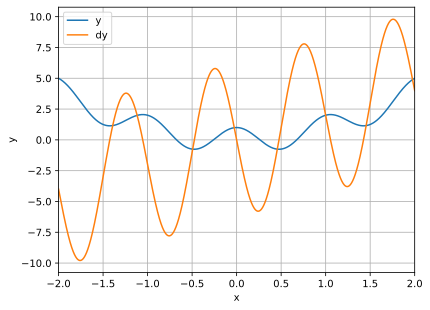

In [105]:
# defining range of x, evenly spaced points, with 2001 steps
x = np.linspace(-2,2,2001) 

# actual plot
plt.plot(x,func(x),x,der(x))
plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['y','dy'])
plt.show

#### note: it is very easy for the gradient decent algo to get stuck in multiple different local minima here.

***
## Challenge: Gradient Decent of new function

#### next guess = first guess - $J'(W)$*learning rate

In [106]:
# example 1) gradient decent algorithm

# 1. random starting point
local_min = np.random.choice(x,1)
print("First guess for local min:", local_min)
# setting up learning parameters
learning_rate = 0.01
training_epochs = 100

# 2. training
for i in range(training_epochs):
    gradient = der(local_min)

    # modifying local minimum guess
    local_min = local_min - (gradient*learning_rate)
print("Final guess for local min:", local_min)

First guess for local min: [1.13]
Final guess for local min: [1.42506741]


### Plotting results of gradient decent

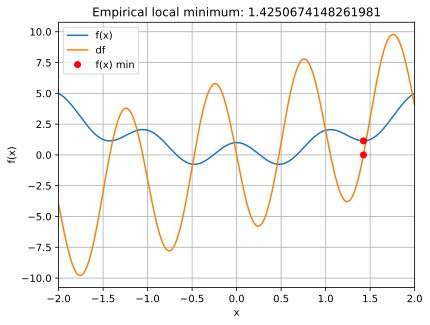

In [107]:
plt.plot(x,func(x),x,der(x))

# plotting derivative at local min values
plt.plot(local_min,der(local_min),'ro')

# plotting function at local min values
plt.plot(local_min,func(local_min),'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df','f(x) min'])
plt.title('Empirical local minimum: %s'%local_min[0]) # value from gradient decent
plt.show()

## Hardcoding Starting value to be 0

In [108]:
# example 1) hardcoded value to be 0 (intentionally wrong) as a starting value

#local_min = np.random.choice(x,1)
local_min = np.array([0]) # initial guess set to zero
print("First guess for local min:", local_min)

learning_rate = 0.01
training_epochs = 100

# running through epochs and storing all results
model_params = np.zeros((training_epochs,2)) # vector to store results

# showing how the algorithm fails
for i in range(training_epochs):
    gradient = der(local_min)
    # local_min = local_min - 0, it stays the same for every epoch
    local_min = local_min - (gradient*learning_rate) 

    # storing parameters
    model_params [i,0] = local_min
    model_params [i,1] = gradient

print("Final guess for local min:",local_min)

First guess for local min: [0]
Final guess for local min: [0.]


<function matplotlib.pyplot.show(close=None, block=None)>

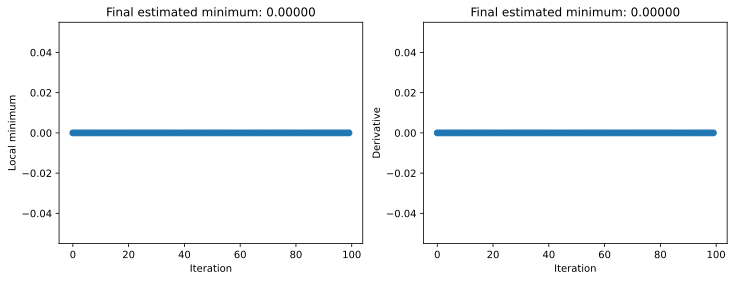

In [110]:
# plotting modified gradient decent algorithm over iterations

fig,ax = plt.subplots(1,2,figsize=(12,4))

for i in range(2):
    ax[i].plot(model_params[:,i],'o-')
    ax[i].set_xlabel('Iteration')
    ax[i].set_title(f'Final estimated minimum: {local_min[0]:.5f}')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')

plt.show

## Observations with this challenge - Vanishing Gradient
- The starting point is unfortunate because the derivative IS at 0, but the function is at a *maximum* at that point. 
- The gradient decent algorithm doesn't work because the derivative is already 0. It is designed to stop guessing when the derivative reaches 0.
    - It does not move from the initial guess.
- **Graph Behavior**: If this was a model, it could be interpreted with these graphs that there is **no learning**.
<br><br>
- This is mostly avoided with the common convention of **having a random starting point**. The chances of this happening are generally small.